In [2]:
# !pip install lifelines

In [56]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('H:\\Survival Analytics\\survival_unemployment.csv')

In [5]:
data.shape

(3343, 3)

In [6]:
data.isna().any().sum()

0

In [7]:
data.head()

,spell,event,ui
0,5,1,0
1,13,1,1
2,21,1,1
3,3,1,1
4,9,0,1


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
spell,3343.0,6.247981,5.611271,1.0,2.0,5.0,9.0,28.0
event,3343.0,0.320969,0.466919,0.0,0.0,0.0,1.0,1.0
ui,3343.0,0.552797,0.497279,0.0,0.0,1.0,1.0,1.0


In [9]:
target = data.spell

In [10]:
target

0        5
1       13
2       21
3        3
4        9
        ..
3338    11
3339     4
3340     5
3341     1
3342     8
Name: spell, Length: 3343, dtype: int64

In [13]:
# Importing the KaplanMeierFitter model to fit the survival analysis


In [14]:
kmf  =KaplanMeierFitter()

In [15]:
kmf.fit(target,event_observed=data.event)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 3343 total observations, 2270 right-censored observations>

<AxesSubplot:xlabel='timeline'>

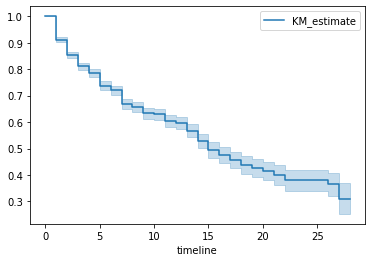

In [16]:
kmf.plot() # Time-line estimations plot 

In [17]:
# Over Multiple groups 
# For each group, here group is ui
data.ui.value_counts()

1    1848
0    1495
Name: ui, dtype: int64

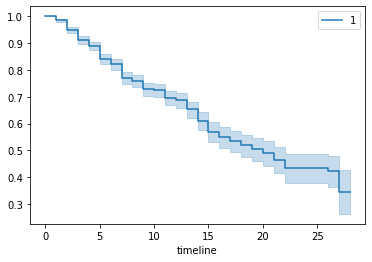

In [63]:
kmf.fit(target[data.ui==1],data.event[data.ui==1],label='1')
# Applying KaplanMeierFitter model on Time and Events for the group "1"
ax = kmf.plot()

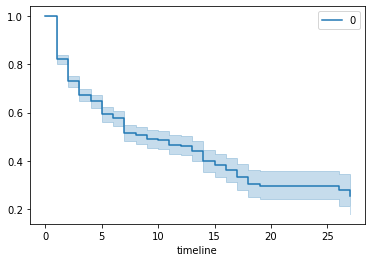

In [27]:
# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(target[data.ui==0], data.event[data.ui==0], label='0')
kmf.plot()
plt.show()

In [28]:
kmf.conditional_time_to_event_

,0 - Conditional median duration remaining to event
timeline,
0.0,9.0
1.0,13.0
2.0,14.0
3.0,14.0
4.0,14.0
5.0,21.0
6.0,20.0
7.0,20.0
8.0,19.0


In [31]:
kmf.median_survival_time_

9.0

In [41]:
kmf.confidence_interval_

,0_lower_0.95,0_upper_0.95
0.0,1.000000,1.000000
1.0,0.801728,0.840543
2.0,0.706044,0.752738
3.0,0.647612,0.699253
4.0,0.619180,0.673875
5.0,0.561126,0.621842
6.0,0.544552,0.607367
7.0,0.479858,0.550369
8.0,0.468266,0.540396
9.0,0.452856,0.527173


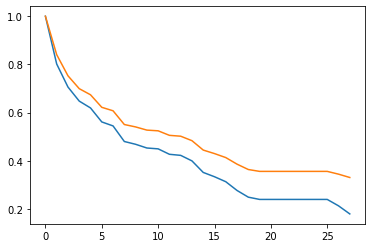

In [43]:
plt.plot(kmf.confidence_interval_)
plt.show()

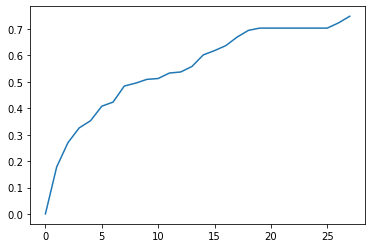

In [46]:
plt.plot(kmf.cumulative_density_)

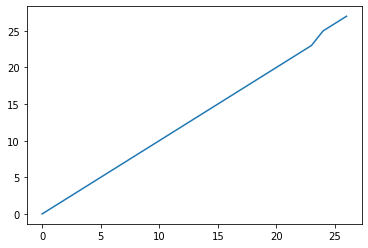

In [47]:
plt.plot(kmf.timeline)

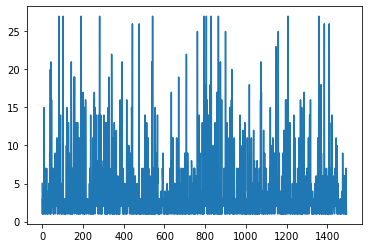

In [49]:
plt.plot(kmf.durations)

<AxesSubplot:xlabel='timeline'>

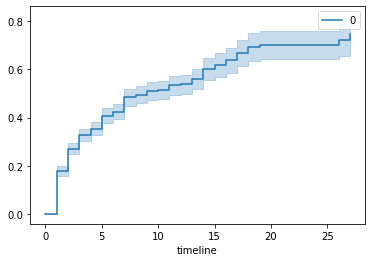

In [51]:
kmf.plot_cumulative_density()

<AxesSubplot:xlabel='timeline'>

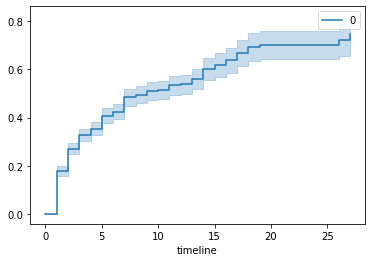

In [53]:
kmf.plot_cumulative_density()

In [57]:
from lifelines import LogNormalFitter

In [58]:
lnf = LogNormalFitter()

In [59]:
lnf.fit(target,event_observed=data.event)

<lifelines.LogNormalFitter:"LogNormal_estimate", fitted with 3343 total observations, 2270 right-censored observations>

<AxesSubplot:>

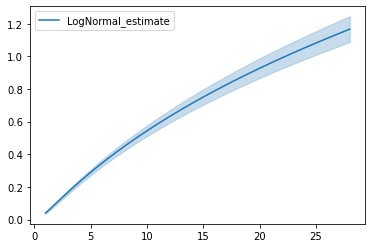

In [60]:
lnf.plot()

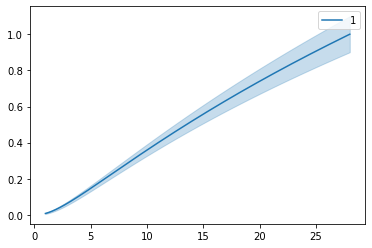

In [64]:
lnf.fit(target[data.ui==1],data.event[data.ui==1],label='1')
# Applying KaplanMeierFitter model on Time and Events for the group "1"
ax1 = lnf.plot()

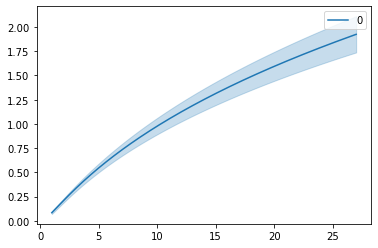

In [65]:
lnf.fit(target[data.ui==0],data.event[data.ui==0],label='0')
# Applying KaplanMeierFitter model on Time and Events for the group "1"
ax1 = lnf.plot()

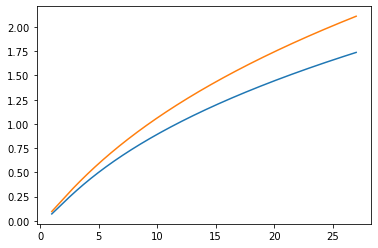

In [72]:
plt.plot(lnf.confidence_interval_)

In [84]:
print(lnf.print_summary())

<lifelines.LogNormalFitter:"0", fitted with 1495 total observations, 919 right-censored observations>
   number of observations = 1495
number of events observed = 576
           log-likelihood = -1856.39
               hypothesis = mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%     z      p   -log2(p)
mu_      1.88       0.05             1.78             1.98 37.94 <0.005        inf
sigma_   1.34       0.04             1.26             1.43  8.30 <0.005      53.06
---
AIC = 3716.79

None


In [70]:
lnf.AIC_

3716.786910501189

<AxesSubplot:>

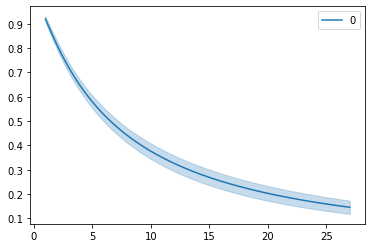

In [76]:
lnf.plot_survival_function()

<AxesSubplot:>

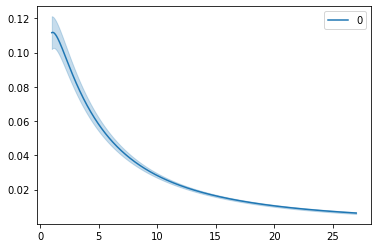

In [77]:
lnf.plot_density()